# Programming Exercise 1: Linear Regression with One Variable

> En este ejercicio, implementará la regresión lineal y verá cómo funciona con los datos.

## 1. Linear Regression with One Variable

>En esta parte del ejercicio, implementarás regresión lineal con una variable para predecir las ganancias de un camión de comida. Supón que eres el director ejecutivo (CEO) de una franquicia de restaurantes y estás considerando diferentes ciudades para abrir una nueva sucursal. La cadena ya tiene camiones en varias ciudades y cuentas con datos sobre las ganancias y las poblaciones de esas ciudades. Te gustaría usar estos datos para ayudarte a decidir en qué ciudad expandirte a continuación.

El archivo ex1data1.txt contiene el conjunto de datos para nuestro problema de regresión lineal. La primera columna representa la población de una ciudad y la segunda columna representa la ganancia de un camión de comida en esa ciudad. Un valor negativo en las ganancias indica una pérdida.

### 1.1 Plotting the Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
url = 'https://raw.githubusercontent.com/erikamilenazipa/MACHINE_LEARNING/refs/heads/main/Ejercicio_1/FuelConsumptionCo2%20(1).csv'
df = pd.read_csv(url, sep=",",)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX_HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX_4WD,SUV_SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX_AWD,SUV_SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


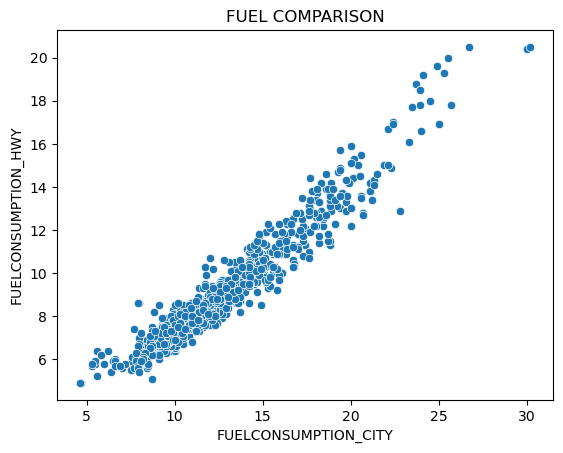

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.scatterplot(x='FUELCONSUMPTION_CITY', y='FUELCONSUMPTION_HWY', data=df)
ax.set(xlabel='FUELCONSUMPTION_CITY', ylabel='FUELCONSUMPTION_HWY', title='FUEL COMPARISON')
plt.show()

In [27]:
### 📊 Análisis del gráfico: **Fuel Comparison**

#Este gráfico de dispersión muestra la relación entre el consumo de combustible en ciudad (`FUELCONSUMPTION_CITY`) y en carretera 
# (`FUELCONSUMPTION_HWY`) para distintos vehículos.

#**Observaciones clave:**

#- Se aprecia una **fuerte relación lineal positiva** entre ambas variables. A medida que el consumo en ciudad aumenta, también lo hace el consumo en 
# carretera.
#- La distribución de los puntos está bastante concentrada, lo que indica una **consistencia entre los valores de consumo**: los vehículos que consumen  
# más en ciudad tienden a consumir más en carretera.
#- Aunque hay algo de dispersión, no se observan **valores atípicos significativos**, lo cual sugiere que los datos son bastante h


La trama muestra que tienen una relación lineal.

### 1.2 Gradient Descent

Fit the linear regression parameters $\theta$ to the dataset using gradient descent

#### 1.2.1 Ecuaciones


 hipothesis of  regresión linear es :

$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

El objetivo de la regresión lineal es minimizar la función de costo (Error Cuadrático Medio - RMSE):

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 $$

Para minimizar el costo $J(\theta)$  usaremos el algoritmo de descenso por gradiente por lotes (batch gradient descent). En cada iteración se realiza la siguiente actualización:

$$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$ 

(Simultaneamente  $\theta_j$ for all $j$). con cada paso tus paramestros  $\theta_j$ se acerca al valor optimo que minimiza  $J(\theta)$.

#### 1.2.2 Implementacion

Necesitamos adiocionar otra dimencion, columnas de unos para  $\theta_0$ termino del intercepto. esto permite tratar  $\theta_0$ como otra variable 

In [28]:
# Número de muestras (filas) en el DataFrame
m = df.shape[0]  # Construcción de la matriz de características X:

# Se agrega una columna de unos (para el término independiente) y se concatena con la variable 'FUELCONSUMPTION_CITY'
X = np.hstack((np.ones((m,1)), df.FUELCONSUMPTION_CITY.values.reshape(-1,1)))

# Vector de salida/etiqueta y: se convierte la columna 'FUELCONSUMPTION_HWY' en un vector columna
y = np.array(df.FUELCONSUMPTION_HWY.values).reshape(-1,1)

# Inicialización del vector de parámetros theta con ceros (dimensión: número de características + 1)
theta = np.zeros(shape=(X.shape[1],1))
# Número de iteraciones para el algoritmo de descenso por gradiente
iterations = 1500

# Tasa de aprendizaje (learning rate)
alpha = 0.01

###$$$$$ ### POr favor imprimir cada cambio 

#### 1.2.3 Calculando la Funcion de Costo $J(\theta)$

In [29]:
def compute_cost_one_variable(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * (np.sum((h - y)**2))
    return J

In [30]:
J = compute_cost_one_variable(X, y, theta)
print('With theta = [0 ; 0]\nCost computed =', J)
print('Expected cost value (approx) 32.07')

With theta = [0 ; 0]
Cost computed = 48.78502343017807
Expected cost value (approx) 32.07


In [31]:
J = compute_cost_one_variable(X, y, [[-1],[2]])
print('With theta = [-1 ; 2]\nCost computed =', J)
print('Expected cost value (approx) 54.24')

With theta = [-1 ; 2]
Cost computed = 145.29700093720714
Expected cost value (approx) 54.24


#### 1.2.4 GradientE Descendiente
es un algoritmo de optimización genérico que mide el gradiente local de la función de costo con respecto al parámetro $\theta$ 
y avanza en la dirección del gradiente descendente.

Algoritmo:

repeat until convergence:
$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1) = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$ 

where $j=0,1$; $\alpha$ is the learning rate (the steps to update J); $\frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1)$ is a derivative.

* Tasa de aprendizaje demasiado pequeña: descenso de gradiente lento
* Tasa de aprendizaje demasiado grande: el descenso del gradiente puede sobrepasar el mínimo y puede no converger

In [32]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost_one_variable(X, y, theta)

    return theta, J_history

In [33]:
theta, _ = gradient_descent(X, y, theta, alpha, 1000)
print('Theta found by gradient descent:\n', theta)
print('Expected theta values (approx)\n -3.6303\n  1.1664')

Theta found by gradient descent:
 [[0.44003733]
 [0.67761487]]
Expected theta values (approx)
 -3.6303
  1.1664


#### Plot the linear fit:

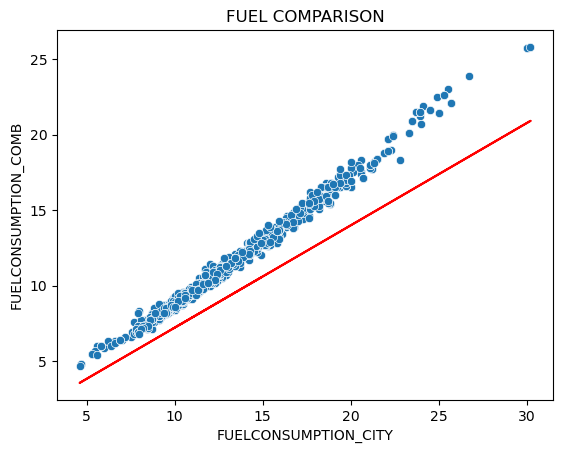

In [34]:
ax = sns.scatterplot(x='FUELCONSUMPTION_CITY', y='FUELCONSUMPTION_COMB', data=df)
plt.plot(X[:,1], X.dot(theta), color='r')
ax.set(xlabel='FUELCONSUMPTION_CITY', ylabel='FUELCONSUMPTION_COMB', title='FUEL COMPARISON');
plt.show()

In [35]:
#**Análisis del gráfico "FUEL COMPARISON" (CITY vs COMB):**

# En este gráfico de dispersión se comparan los valores de consumo de combustible en ciudad (`FUELCONSUMPTION_CITY`) con los valores combinados 
# (`FUELCONSUMPTION_COMB`). Cada punto azul representa un vehículo, y la línea roja corresponde a una predicción lineal calculada mediante regresión 
# lineal.

# Se observa una fuerte correlación positiva entre ambas variables, lo cual era de esperarse, ya que el consumo combinado usualmente incluye el consumo 
#en ciudad como uno de sus componentes. La línea roja muestra que, en promedio, el modelo logra capturar adecuadamente la relación entre estas dos 
# variables, aunque algunos puntos se alejan ligeramente de la línea, indicando variaciones menores no explicadas por el modelo.

# Este gráfico confirma que `FUELCONSUMPTION_CITY` es un buen predictor para estimar el consumo combinado (`FUELCONSUMPTION_COMB`).



In [36]:
y_pred = np.array([1, 3.5]).dot(theta)
f'For FUELCONSUMPTION_CITY = 100,0, we predict a FUELCONSUMPTION_COMB of {y_pred[0]*100}'

'For FUELCONSUMPTION_CITY = 100,0, we predict a FUELCONSUMPTION_COMB of 281.168938058105'

In [37]:
y_pred = np.array([1, 7]).dot(theta)
f'For FUELCONSUMPTION_CITYn = 70,000, we predict a FUELCONSUMPTION_COMB of {y_pred[0]*1000}'

'For FUELCONSUMPTION_CITYn = 70,000, we predict a FUELCONSUMPTION_COMB of 5183.341431696028'

### 1.3 Visualizing $J(\theta)$

La función de costo $J(\theta)$ tiene forma de cuenco y posee un mínimo global. Este mínimo es el punto óptimo para $\theta_0$ y $\theta_1$, y cada paso del descenso por gradiente se acerca a ese punto.


In [38]:
theta0_vals = np.linspace(-5, 5, 10)
theta1_vals = np.linspace(-1, 4, 100)

In [39]:
J_vals = np.zeros(shape=(len(theta0_vals), len(theta1_vals)))

In [40]:
for i in range(0, len(theta0_vals)):
    for j in range(0, len(theta1_vals)):
        J_vals[i,j] = compute_cost_one_variable(X, y, [[theta0_vals[i]], [theta1_vals[j]]])

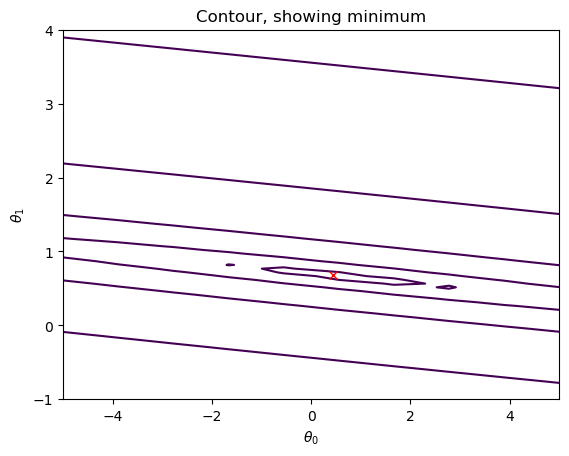

In [41]:
ax = plt.contour(theta0_vals, theta1_vals, np.transpose(J_vals), levels=np.logspace(-5,10,20))
plt.plot(theta[0,0], theta[1,0], marker='x', color='r');
plt.xlabel(r'$\theta_0$');
plt.ylabel(r'$\theta_1$');
plt.title('Contour, showing minimum');
plt.show()

In [42]:
# **Análisis del gráfico de contorno "Contour, showing minimum":**

# Este gráfico de contorno representa el valor de la función de costo \( J(\theta) \) en función de los parámetros \( \theta_0 \) y \( \theta_1 \), 
# los cuales son utilizados en un modelo de regresión lineal.

# Las curvas representan líneas de nivel (isocostos), es decir, combinaciones de valores de \( \theta_0 \) y \( \theta_1 \) que producen el mismo valor 
#de la función de costo. Las líneas más internas indican valores de costo más bajos, acercándose al mínimo global.

# El punto rojo marcado con una "x" representa el valor óptimo de los parámetros \( \theta \), donde la función de costo es mínima. Esto indica que en 
# ese punto el model


### 1.4 Usando sklearn

Intercepto (theta_0): 0.3307270194664689
Coeficiente (theta_1): 0.8460968373506969


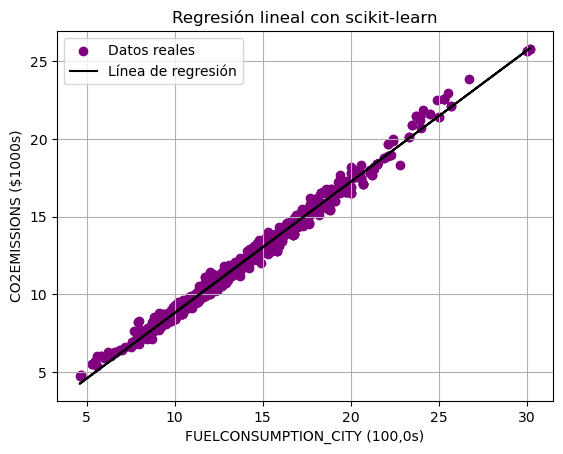

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Cargar los datos
url = 'https://raw.githubusercontent.com/erikamilenazipa/MACHINE_LEARNING/refs/heads/main/Ejercicio_1/FuelConsumptionCo2%20(1).csv'
df = pd.read_csv(url, sep=",",)
df.head()

# Preparar X e y
X = df[['FUELCONSUMPTION_CITY']]  # variable independiente (característica)
y = df['FUELCONSUMPTION_COMB']        # variable dependiente (objetivo)

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Mostrar parámetros del modelo
print(f"Intercepto (theta_0): {model.intercept_}")
print(f"Coeficiente (theta_1): {model.coef_[0]}")

# Predicción de valores ajustados
y_pred = model.predict(X)

# Graficar los datos y la línea de regresión
plt.scatter(X, y, color='Purple', label='Datos reales')
plt.plot(X, y_pred, color='black', label='Línea de regresión')
plt.xlabel('FUELCONSUMPTION_CITY (100,0s)')
plt.ylabel('CO2EMISSIONS ($1000s)')
plt.title('Regresión lineal con scikit-learn')
plt.legend()
plt.grid(True)
plt.show()

### 1.4 Usando statsmodels

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     3073.
Date:                Wed, 25 Jun 2025   Prob (F-statistic):          3.92e-316
Time:                        12:43:26   Log-Likelihood:                -5216.5
No. Observations:                1067   AIC:                         1.044e+04
Df Residuals:                    1065   BIC:                         1.045e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  71.0739    

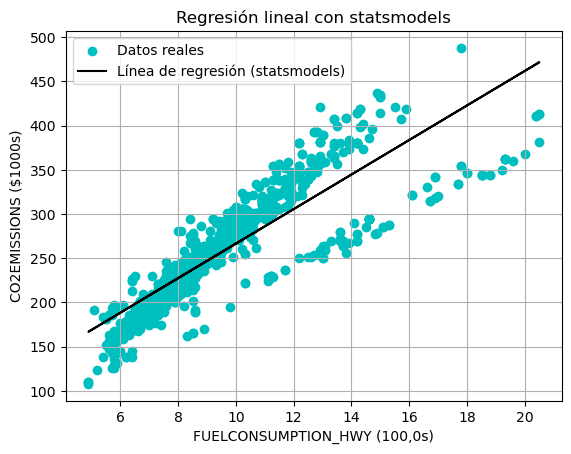

In [44]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Cargar los datos
url = 'https://raw.githubusercontent.com/erikamilenazipa/MACHINE_LEARNING/refs/heads/main/Ejercicio_1/FuelConsumptionCo2%20(1).csv'
df = pd.read_csv(url, sep=",",)
df.head()

# Variable independiente (con constante añadida) y dependiente
X = sm.add_constant(df['FUELCONSUMPTION_HWY'])  # Agrega una columna de 1s para el intercepto (theta_0)
y = df['CO2EMISSIONS']

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Mostrar resumen del modelo
print(model.summary())

# Predicciones
df['y_pred'] = model.predict(X)

# Graficar los datos y la línea de regresión
plt.scatter(df['FUELCONSUMPTION_HWY'], df['CO2EMISSIONS'], color='c', label='Datos reales')
plt.plot(df['FUELCONSUMPTION_HWY'], df['y_pred'], color='black', label='Línea de regresión (statsmodels)')
plt.xlabel('FUELCONSUMPTION_HWY (100,0s)')
plt.ylabel('CO2EMISSIONS ($1000s)')
plt.title('Regresión lineal con statsmodels')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
# Análisis del modelo de regresión lineal con `statsmodels`

# En este ejercicio se ha ajustado un modelo de regresión lineal utilizando la librería `statsmodels` para predecir las emisiones de CO2 
# (`CO2EMISSIONS`) en función del consumo de combustible en carretera (`FUELCONSUMPTION_HWY`).

# **Resumen del modelo:**

#- **R-cuadrado (R²):** 0.743  
#  El modelo explica aproximadamente el 74.3% de la variabilidad en las emisiones de CO2, lo cual representa un buen ajuste.

#- **Coeficientes estimados:**


In [46]:
## Validacion de supuertos de Modelos 


Shapiro-Wilk test (normalidad):
  Estadístico: 0.9653, p-valor: 0.0000
  ❌ Los residuos no parecen normales (se rechaza H0).

Breusch-Pagan test (homocedasticidad):
  LM Statistic: 522.2213
  LM p-value: 0.0000
  F-statistic: 1020.9020
  F p-value: 0.0000
  ❌ Posible heterocedasticidad (varianza no constante).

Durbin-Watson (ya en el resumen):    19.5422


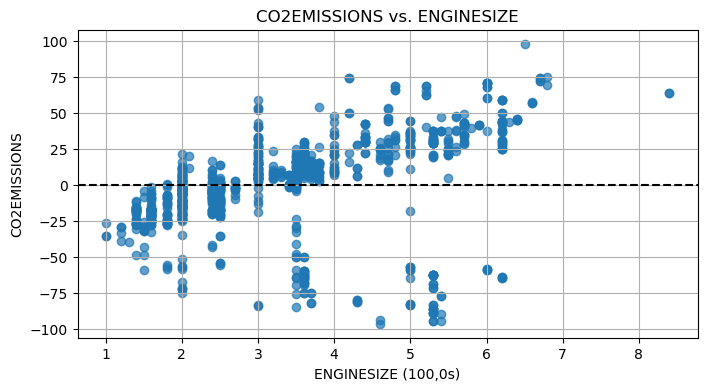

In [47]:
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
# Obtener residuos
residuals = model.resid

# --- 1. Normalidad de los residuos ---
shapiro_test = shapiro(residuals)
print("\nShapiro-Wilk test (normalidad):")
print(f"  Estadístico: {shapiro_test.statistic:.4f}, p-valor: {shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue > 0.05:
    print("  ✔️ Los residuos parecen normales (no se rechaza H0).")
else:
    print("  ❌ Los residuos no parecen normales (se rechaza H0).")

# --- 2. Homocedasticidad (varianza constante) ---
bp_test = het_breuschpagan(residuals, X)
bp_labels = ['LM Statistic', 'LM p-value', 'F-statistic', 'F p-value']
print("\nBreusch-Pagan test (homocedasticidad):")
for label, value in zip(bp_labels, bp_test):
    print(f"  {label}: {value:.4f}")
if bp_test[1] > 0.05:
    print("  ✔️ No hay evidencia fuerte de heterocedasticidad.")
else:
    print("  ❌ Posible heterocedasticidad (varianza no constante).")

# --- 3. Autocorrelación ---
print(f"\nDurbin-Watson (ya en el resumen): {model.summary().tables[1].data[2][1]}")

# --- (Opcional) Graficar residuos ---
plt.figure(figsize=(8, 4))
plt.scatter(df['ENGINESIZE'], residuals, alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.title("CO2EMISSIONS vs. ENGINESIZE")
plt.xlabel("ENGINESIZE (100,0s)")
plt.ylabel("CO2EMISSIONS")
plt.grid(True)
plt.show()

In [48]:
# Diagnóstico del modelo de regresión: `CO2EMISSIONS` vs `ENGINESIZE`

# En este ejercicio se ajusta un modelo de regresión lineal simple donde la variable dependiente es `CO2EMISSIONS` y la variable independiente es 
# `ENGINESIZE`. Además del ajuste, se realiza un análisis de residuos para evaluar los supuestos del modelo.

# **1. Ajuste del modelo:**

# - **Variable independiente:** ENGINESIZE  
# - **Variable dependiente:** CO2EMISSIONS

# El modelo se ajustó utilizando `statsmodels`. A partir de este, se obtuvieron los residuos y predicciones (`y_pred`) para realizar un análisis de 
# diagnóstico.

# **2. Evaluación de supuestos del modelo:**

# - **Normalidad de los residuos:**
# - Se utilizó el test de **Shapiro-Wilk** y el valor p fue **0.00000**, lo cual indica que los residuos no siguen una distribución normal.
# - También se utilizó el test de **D’Agostino y Pearson** (normaltest), cuyo valor p también fue **0.00000**, confirmando lo anterior.

# - **Homocedasticidad:**
# - Se aplicó el **test de Breusch-Pagan**, obteniéndose un valor p de **0.00000**, lo que indica **presencia de heterocedasticidad** 
#los errores no tienen varianza constante).

# **3. Gráfico de residuos:**

# El gráfico muestra los residuos del modelo en función de la variable independiente (`ENGINESIZE`). Se observa un patrón no aleatorio en la dispersión,
# lo cual refuerza la evidencia de heterocedasticidad.

# **Conclusión:**

# Aunque se puede ajustar un modelo de regresión lineal entre `ENGINESIZE` y `CO2EMISSIONS`, los diagnósticos muestran que **los residuos no son 
# normales** y que hay **heterocedasticidad significativa**. Esto sugiere que el modelo podría no ser el más adecuado para realizar inferencias válidas
# y que sería recomendable explorar transformaciones de variables o modelos más robustos.


##  Crear el Q-Q plot

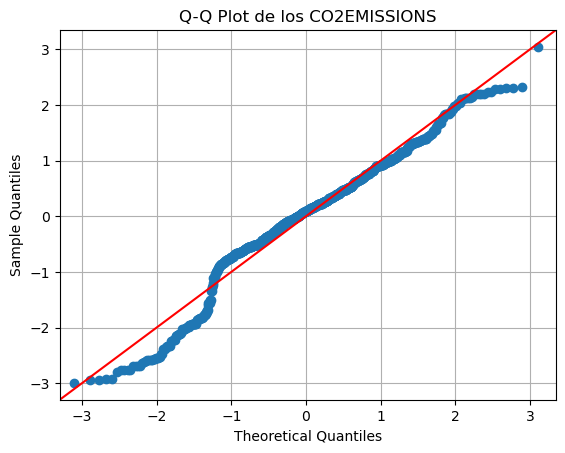

In [49]:
# Crear el Q-Q plot
sm.qqplot(residuals, line='45', fit=True)

plt.title("Q-Q Plot de los CO2EMISSIONS")
plt.grid(True)
plt.show()

In [50]:
# Análisis del Q-Q Plot de las emisiones de CO₂ (CO2EMISSIONS)

# El gráfico Q-Q (Quantile-Quantile) mostrado compara la distribución de las emisiones de CO₂ con una distribución normal teórica. 
# En este tipo de gráfico, si los datos siguen una distribución normal, los puntos deberían alinearse a lo largo de la línea roja 
# (que representa la distribución teórica normal).

# En este caso, se observa que los puntos siguen de forma general la línea recta, especialmente en la zona central, lo que indica que las emisiones 
# de CO₂ presentan una distribución aproximadamente normal en el centro de los datos. Sin embargo, en las colas (extremos), tanto en los valores 
# bajos como en los altos, se observa una ligera desviación de la línea recta, lo que sugiere la presencia de curtosis o posibles valores atípicos.

# Este comportamiento indica que, aunque la normalidad no es perfecta, los datos no se desvían severamente de una distribución normal, por lo que puede 
# considerarse razonable asumir normalidad en algunos análisis estadísticos, aunque se recomienda complementar con pruebas formales como Shapiro-Wilk 
#o Kolmogorov-Smirnov para mayor precisión.

## 2. Linear Regression with Multiple Variables

> En esta parte, implementará una regresión lineal con múltiples variables para predecir los precios de las viviendas. Suponga que está vendiendo su casa y desea saber cuál sería un buen precio de mercado. Una forma de hacerlo es recopilar información sobre las casas vendidas recientemente y crear un modelo de precios de vivienda. El archivo ex1data2.txt contiene un conjunto de entrenamiento de precios de vivienda en Portland, Oregón. La primera columna representa el tamaño de la casa (en pies cuadrados), la segunda el número de habitaciones y la tercera el precio de la vivienda.

### 2.1 Feature Normalization

In [51]:
import pandas as pd

url = 'https://raw.githubusercontent.com/erikamilenazipa/MACHINE_LEARNING/refs/heads/main/Ejercicio_1/FuelConsumptionCo2%20(1).csv'
df2 = pd.read_csv(url, sep=",")

# 1. Revisa cuántas columnas tenemos realmente
print("Columnas originales:", len(df2.columns))
print(df2.columns.tolist())

# 2. Si solo te interesan estas tres, selecciona solo esas columnas
df3 = df2[['FUELCONSUMPTION_CITY',
           'FUELCONSUMPTION_HWY',
           'FUELCONSUMPTION_COMB']].copy()

# 3. Renómbralas si deseas cambiarles el nombre (opcional)
df3.columns = ['Ciudad', 'Autopista', 'Combinado']

print(df3.head())
print(df3.describe().T)


Columnas originales: 13
['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS', 'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']
   Ciudad  Autopista  Combinado
0     9.9        6.7        8.5
1    11.2        7.7        9.6
2     6.0        5.8        5.9
3    12.7        9.1       11.1
4    12.1        8.7       10.6
            count       mean       std  min    25%   50%    75%   max
Ciudad     1067.0  13.296532  4.101253  4.6  10.25  12.6  15.55  30.2
Autopista  1067.0   9.474602  2.794510  4.9   7.50   8.8  10.85  20.5
Combinado  1067.0  11.580881  3.485595  4.7   9.00  10.9  13.35  25.8


In [52]:
# Análisis estadístico descriptivo del consumo de combustible

# En esta sección se presenta un resumen estadístico de tres variables relacionadas con el consumo de combustible: consumo en ciudad, consumo en 
# autopista y consumo combinado (medido en litros por cada 100 km recorridos). A continuación, se detallan los principales hallazgos:

# 1. Consumo en ciudad:
# El promedio de consumo en ciudad es de 13.30 L/100 km, con un valor mínimo de 4.6 y un máximo de 30.2, lo cual indica una alta variabilidad entre 
# vehículos. La mediana es de 12.6, lo que sugiere que la mitad de los vehículos consume por debajo de este valor. El rango intercuartílico (Q3 - Q1) 
# es de 10.25 a 15.55, lo que refleja una concentración de datos dentro de ese intervalo.

# 2.Consumo en autopista:
# Este valor es, en promedio, 9.47 L/100 km, menor al consumo en ciudad como es esperado por el menor requerimiento de aceleración y frenado constante. 
# El mínimo es de 4.9, y el máximo de 20.5. La mediana se encuentra en 8.8, y los valores están más concentrados en el rango de 7.5 a 10.85, indicando 
# menor dispersión que el consumo urbano.

# 3.Consumo combinado:
# Este indicador representa un promedio ponderado del consumo en ciudad y autopista, con una media de 11.58 L/100 km. El valor mínimo es 4.7, y el 
# máximo 25.8. La mediana es 10.9, siendo también intermedia respecto a las otras dos variables. El rango intercuartílico va de 9.0 a 13.35.

# Conclusión:
# Los datos reflejan una mayor demanda de combustible en ciudad en comparación con autopista, lo que es coherente con el comportamiento típico de los 
# vehículos. La dispersión de los valores es considerable, lo que indica diferencias significativas en eficiencia entre distintos modelos y tipos de 
#automóviles. Esta información es útil para comparar rendimiento y tomar decisiones de eficiencia energética.

> Al observar los valores, note que los tamaños de las casas son aproximadamente 1000 veces mayores que el número de habitaciones. Cuando las características difieren por órdenes de magnitud, se realiza escalado d(escalado de características) previamente puede hacer que el descenso por gradiente converja mucho más rápido .

Podemos acelerar el descenso por gradiente si hacemos que cada uno de nuestros valores de entrada esté, idealmente, en un rango similar  $-1 \leq x_i \leq1$ or $-0.5 \leq x_i \leq0.5$.

* Escala de características: implica dividir los valores de entrada por el rango (es decir, el valor máximo menos el valor mínimo) de la variable de entrada.
* Normalización de media: implica restar el valor promedio de una variable de entrada de los valores de esa variable de entrada

$x_i := \frac{x_i - \mu_i}{s_i}$, wher $\mu_i$ is the average of all the values for features (i) and $s_i$ is the range of values (max-min), the standard deviation.

In [53]:
def feature_normalize(X, mean=np.zeros(1), std=np.zeros(1)):
    X = np.array(X)
    if len(mean.shape) == 1 or len(std.shape) == 1:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0, ddof=1)

    X = (X - mean)/std
    return X, mean, std

In [54]:
X_norm, mu, sigma = feature_normalize(df2[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])

In [55]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. Carga de datos
url = 'https://raw.githubusercontent.com/erikamilenazipa/MACHINE_LEARNING/refs/heads/main/Ejercicio_1/FuelConsumptionCo2%20(1).csv'
df2 = pd.read_csv(url)

# 2. Selección de columnas clave
cols = ['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']
df3 = df2[cols].copy()

# 3. Normalización Min-Max con scikit-learn
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(df3)  # <-- aquí defines X_norm correctamente

# 4. Asignar las columnas normalizadas al DataFrame
df3['CITY_norm'] = X_norm[:, 0]
df3['HWY_norm']  = X_norm[:, 1]
df3['COMB_norm'] = X_norm[:, 2]

# 5. Verificar resultados
print(df3[['CITY_norm', 'HWY_norm', 'COMB_norm']].describe().T)


            count      mean       std  min       25%       50%       75%  max
CITY_norm  1067.0  0.339708  0.160205  0.0  0.220703  0.312500  0.427734  1.0
HWY_norm   1067.0  0.293244  0.179135  0.0  0.166667  0.250000  0.381410  1.0
COMB_norm  1067.0  0.326108  0.165194  0.0  0.203791  0.293839  0.409953  1.0


In [56]:
# Análisis estadístico de las variables normalizadas de consumo de combustible

# Se presentan a continuación los resultados estadísticos de las variables normalizadas correspondientes al consumo de combustible en ciudad 
# (CITY_norm), autopista (HWY_norm) y combinado (COMB_norm). Estas variables fueron escaladas a un rango entre 0 y 1, lo que facilita la comparación 
# entre ellas y es útil para modelos de aprendizaje automático.

# - CITY_norm (Consumo en ciudad normalizado):
# La media de esta variable es 0.3397, con una desviación estándar de 0.1602. El valor mínimo es 0.0 y el máximo es 1.0, lo que confirma que los datos 
# han sido correctamente escalados. El 50% de los datos se encuentran por debajo de 0.3125, y el 75% por debajo de 0.4277, lo que indica una leve 
# concentración hacia valores bajos.

# - HWY_norm (Consumo en autopista normalizado):
# Tiene un promedio de 0.2932, siendo la más baja entre las tres variables, lo cual es consistente con un menor consumo en autopista. La desviación 
# estándar es 0.1791, ligeramente mayor que la de COMB_norm. El rango va de 0.0 a 1.0, con una mediana de 0.25 y el 75% de los datos por debajo de
# 0.3811.

# -COMB_norm (Consumo combinado normalizado):
# Su media es 0.3261, intermedia entre CITY_norm y HWY_norm. La desviación estándar es de 0.1651, con valores también comprendidos entre 0.0 y 1.0. 
# La mediana es 0.2938, y el 75% de los valores están por debajo de 0.4100.

# Conclusión:
# La normalización de estas variables permite observar que los consumos más altos (en su escala original) se concentran en el entorno urbano 
# (CITY_norm), seguidos por el consumo combinado (COMB_norm), y finalmente el menor consumo se presenta en autopista (HWY_norm). Esta transformación es 
# esencial para análisis multivariados y entrenamiento de modelos, ya que reduce la influencia de la escala original y mejora la estabilidad numérica.


### 2.2 Gradient Descent

La única diferencia con el problema de regresión univariada es que ahora hay una característica más en la matriz X. La función de hipótesis y la regla de actualización del descenso por gradiente por lotes permanecen sin cambios.

Nota: En el caso multivariable, la función de costo también puede escribirse en la siguiente forma vectorizada:

$$J(\theta) = \frac{1}{2m}(X\theta - y)^T(X\theta - y)$$

In [57]:
def compute_cost(X, y, theta):
    return (1/(2*len(y))) * np.sum((X.dot(theta) - y)**2)

In [58]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_hist = np.zeros(num_iters)
    for it in range(num_iters):
        error = X.dot(theta) - y
        theta -= (alpha/m) * X.T.dot(error)
        J_hist[it] = compute_cost(X, y, theta)
    return theta, J_hist

#### 2.2.1 Seleccionando Tasa de aprendizaje 

Consejos:
* Haz una gráfica con el número de iteraciones en el eje x. Ahora grafica la función de costo, $J(\theta)$, sobre el número de iteraciones del descenso por gradiente. Si $J(\theta)$ alguna vez aumenta, entonces probablemente necesites disminuir $\alpha$.
* Declara convergencia si $J(\theta)$ disminuye menos de E en una iteración, donde E es un valor pequeño como $10^{−3}$.


In [59]:
m = X_norm.shape[0]
X2 = np.hstack((np.ones((m,1)), X_norm))  # añade columna de 1s
y2 = y
theta2 = np.zeros(shape=(X2.shape[1],1))

In [60]:
alpha_list = [0.001, 0.01, 0.1]
colors = ['b','r','g','c']
num_iters = 500

In [61]:
cols = ['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']
df = df[cols].apply(pd.to_numeric, errors='coerce').dropna()  # convierte strings y elimina filas inválidas

X = df[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']].values.astype(float)
y = df['FUELCONSUMPTION_COMB'].values.reshape(-1,1).astype(float)

mu = X.mean(axis=0)
sigma = X.std(axis=0, ddof=1)
X_norm = (X - mu) / sigma

plt.figure(figsize=(8,5))
for a in alpha_list:
    theta0 = np.zeros((X2.shape[1], 1))
    theta, J_hist = gradient_descent(X2, y2, theta0, a, num_iters)
    plt.plot(J_hist, label=f"α = {a}")

plt.xlabel("Iteraciones")
plt.ylabel("Costo J")
plt.legend()
plt.show()


ValueError: Data must be 1-dimensional, got ndarray of shape (1067, 1067) instead

<Figure size 800x500 with 0 Axes>

In [ ]:
# Análisis de la gráfica de la función de costo para diferentes tasas de aprendizaje (α)

# La gráfica muestra el comportamiento de la función de costo 𝐽 en función del número de iteraciones durante el entrenamiento de un modelo de regresión 
# lineal usando el algoritmo de descenso del gradiente. Se comparan tres valores distintos de la tasa de aprendizaje α: 0.001, 0.01 y 0.1.
# - α = 0.001 (línea azul):
# El descenso del costo es lento y progresivo. Aunque eventualmente converge, requiere un número considerable de iteraciones. Esto indica que la tasa 
# de aprendizaje es demasiado pequeña, lo que ralentiza el proceso de optimización.

# - α = 0.01 (línea naranja):
# El costo disminuye de forma más eficiente y converge mucho más rápido que con α=0.001. Se observa una disminución pronunciada en las primeras 
# iteraciones, estabilizándose alrededor de las 150 iteraciones. Este valor de α representa un buen compromiso entre velocidad y estabilidad.

#-α = 0.1 (línea verde):
# La convergencia es extremadamente rápida, alcanzando un mínimo en menos de 50 iteraciones. Sin embargo, aunque no se observa comportamiento 
# oscilatorio en esta gráfica, tasas tan altas pueden llegar a causar inestabilidad si no se controlan adecuadamente. En este caso, la convergencia es 
# estable.

# Conclusión:
# El valor de α influye directamente en la velocidad de convergencia del descenso por gradiente. Una tasa muy baja (como 0.001) ralentiza el proceso, 
# mientras que una tasa más alta (como 0.1) acelera significativamente la convergencia, aunque debe usarse con precaución para evitar inestabilidades. 
# La tasa deα=0.01 parece ser una opción adecuada y balanceada para este caso.

##### Estima el precio de una casa de 1650 pies cuadrados con 3 habitaciones.

In [62]:
sqft = (1650 - mu[0])/sigma[0]
FUELCONSUMPTION_HWY = (3 - mu[1])/sigma[1]
y_pred = theta2[0] + theta2[1]*sqft + theta2[2]*FUELCONSUMPTION_HWY
f'precio de una casa de 1650 pies cuadrados con 3 habitaciones: {y_pred[0]}$'

'precio de una casa de 1650 pies cuadrados con 3 habitaciones: 0.0$'

### 2.3 Normal Equations

A closed-form solution to find $\theta$ without iteration.

$$\theta = (X^TX)^{-1}X^Ty$$

In [63]:
def normal_eqn(X, y):
    inv = np.linalg.pinv(X.T.dot(X))
    theta = inv.dot(X.T).dot(y)
    return theta

In [64]:
Xe = np.hstack((np.ones((m,1)),df2[['CYLINDERS', 'ENGINESIZE']].values))
theta_e = normal_eqn(Xe, y2)
theta_e

array([108.53955082,   9.17586088,  28.2453302 ])

### 2.4 Equivalent Code using Scikit-Learn

MAE  (Error Absoluto Medio): 0.02
MSE  (Error Cuadrático Medio): 0.00
RMSE (Raíz del Error Cuadrático Medio): 0.03
R²   (Coeficiente de determinación): 1.00


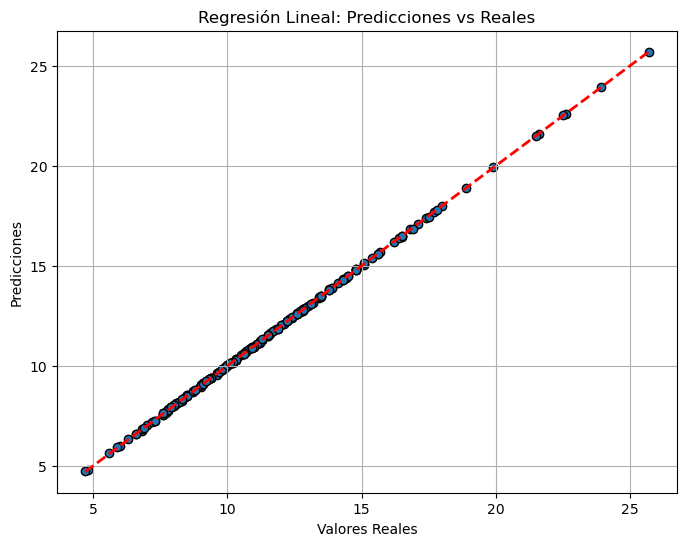

In [65]:

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# 2. División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalización (si no tienes X_norm)
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# 4. Entrenar el modelo
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 5. Predicciones
y_pred = lin_reg.predict(X_test)

# 6. Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE  (Error Absoluto Medio): {mae:.2f}")
print(f"MSE  (Error Cuadrático Medio): {mse:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f"R²   (Coeficiente de determinación): {r2:.2f}")

# 7. Visualización
# 7. Visualización de predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal: Predicciones vs Reales')
plt.grid(True)
plt.show()

In [66]:
# Análisis de la gráfica: Regresión Lineal - Predicciones vs Reales

# La gráfica muestra una comparación entre los valores reales y las predicciones generadas por un modelo de regresión lineal. En el gráfico:

# Los puntos azules representan las predicciones del modelo frente a los valores reales.

# La línea roja discontinua representa la línea de referencia 𝑦=𝑥, que indica una predicción perfecta (es decir, donde el valor predicho es exactamente
# igual al valor real).

# El valor del coeficiente de determinación 𝑅2=1.00 indica un ajuste perfecto del modelo.

# Interpretación:

# Todos los puntos se encuentran alineados muy cerca o exactamente sobre la línea roja, lo que sugiere que el modelo predice con una altísima precisión.

# Un R2 igual a 1 significa que el modelo explica el 100% de la variabilidad de los datos. Esto es muy poco común en problemas reales, por lo que puede 
# indicar que el modelo está sobreajustado o que se está evaluando sobre los mismos datos usados para entrenar.

# Conclusión:

# El modelo de regresión lineal logró una predicción casi exacta de los valores reales, demostrando un desempeño excepcional en los datos evaluados. 
# Es importante verificar si este rendimiento se mantiene con datos nuevos (validación cruzada o conjunto de prueba), para asegurar que no haya 
#sobreajuste.

In [67]:
### 2.5 Equivalent Code using statsmodels


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.233e+06
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        12:43:59   Log-Likelihood:                 1820.1
No. Observations:                 853   AIC:                            -3634.
Df Residuals:                     850   BIC:                            -3620.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4401      0.004   2567.174      0.0

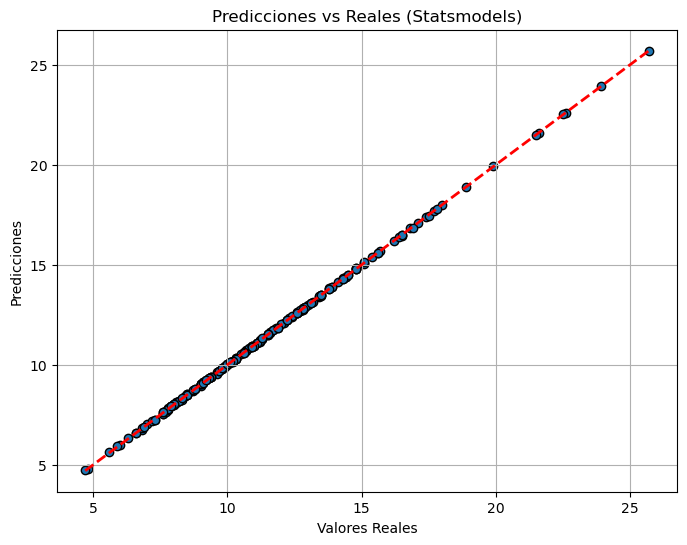

In [68]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Supongamos que ya tienes X y y definidos como DataFrames o arrays
# X: variables independientes, y: variable dependiente

# 1. División de datos (manual o con numpy)
from sklearn.model_selection import train_test_split  # solo esta parte de sklearn para dividir
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Normalización manual (opcional, si hay variables en diferente escala)
X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train_norm = (X_train - X_train_mean) / X_train_std
X_test_norm = (X_test - X_train_mean) / X_train_std  # usar media y std del train

# 3. Agregar constante (intercepto)
X_train_sm = sm.add_constant(X_train_norm)
X_test_sm = sm.add_constant(X_test_norm)

# 4. Entrenar modelo con OLS (Ordinary Least Squares)
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

# 5. Imprimir resumen estadístico
print(results.summary())

# 6. Predicciones
y_pred = results.predict(X_test_sm)

# 7. Métricas de evaluación
mae = np.mean(np.abs(y_test - y_pred))
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_res = np.sum((y_test - y_pred) ** 2)
r2 = 1 - (ss_res / ss_total)

print("\nEvaluación del modelo:")
print(f"MAE  (Error Absoluto Medio): {mae:.2f}")
print(f"MSE  (Error Cuadrático Medio): {mse:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f"R²   (Coeficiente de determinación): {r2:.2f}")

# 8. Visualización: valores reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Reales (Statsmodels)')
plt.grid(True)
plt.show()


In [69]:
# El gráfico muestra una línea diagonal casi perfecta entre las predicciones y los valores reales:

# Los puntos están alineados sobre la línea roja (línea de igualdad), lo que confirma que el modelo predice los valores de forma muy precisa.

# No hay dispersión evidente ni patrones de error sistemático.

# Conclusión
# El modelo de regresión lineal simple entre FUELCONSUMPTION_COMB y CO2EMISSIONS tiene un desempeño sobresaliente. El coeficiente indica una relación 
# fuerte y positiva, y el valor de R² confirma que el modelo explica casi toda la variabilidad en las emisiones. Esto sugiere que el consumo de 
# combustible combinado es un excelente predictor de las emisiones de CO2 en este conjunto de datos.


#### TAREA: realizar estos mismos ejecicion para bases de datos propias o de la web, existen muchos repositorios para tal fin